# Predicting Alcohol Consumption Based On Personality Scores

## Introduction

While not the most dangerous, alcohol is one of the most popular drugs in the world. Its consumption is not only popularized but normalized in modern society, regardless of any negative effects it may have. Many mental factors, such as impulsiveness and neuroticism, can affect how often one consumes alcohol. Furthermore, minimum legal ages fail to stop children and young teens from consuming alcohol. The question we aimed to answer in this project is **“How can we predict the frequency of alcohol consumption based on certain aspects of an individual’s personality?”** The dataset we are using to answer this question is a quantified drug consumption dataset which contains information about 1885 unique individuals. There are 32 columns in total, 12 of which have information about the participant's age, ethnicity, personality measurements, etc. In addition, the dataset contains information regarding these individuals’ use of 19 drugs, ranging from chocolate to heroin, and one fictitious drug (semeron) to filter out false claims. Each value in the drug columns reflects the recency of an individual’s use of a certain drug, ranging from “Never Used” to “Used in Last Day.”

- CL0: Never used
- CL1: Used over a decade ago
- CL2: Used in last decade
- CL3: Used in last year
- CL4: Used in last month
- CL5: Used in last week
- CL6: Used in last day

Here is the information regarding all the columns:

- ID 
- Age (18 to 65+)
- Gender
- Education (level of education)
- Country (country of residence)
- Ethnicity (ethnicity)
- Nscore (measurement of neuroticism)
    + 12 to 60 (non-quantified)
    + -3.46436 to 3.27393 (quantified)
- Escore (measurement of extraversion) 
    + 16 to 59 (non-quantified)
    + -3.27393 to 3.27393 (quantified)
- Oscore (openness to experience)
    + 24 to 60 (non-quantified)
    + -3.27393 to 2.90161 (quantified)
- Ascore (measurement of agreeableness)
    + 12 to 60 (non-quantified)
    + -3.46436 to 3.46436 (quantified)
- Cscore (measurement of conscientiousness)
    + 17 to 59 (non-quantified)
    + -3.46436 to 3.46436 (quantified)
- IScore (measurement of impulsiveness)
    + non-quantified values were not provided
    + -2.55524 to 2.90161 (quantified)
- SS (measurement of sensation seeking)
    + non-quantified values were not provided
    + -2.07848 to 1.92173 (quantified)
- Alcohol (level alcohol consumption)
- Amphetamines (level of amphetamines consumption)
- AmylNitrate (level of amyl nitrite consumption)
- Benzodiazepine (level of benzodiazepine consumption)
- Caffeine (level of caffeine consumption)
- Cannabis (level of cannabis consumption)
- Chocolate (level of chocolate consumption)
- Cocaine (level of cocaine consumption)
- Crack (level of crack consumption)
- Ecstasy (level of ecstasy consumption)
- Heroin (level of heroin consumption)
- Ketamine (level of ketamine consumption)
- LegalHighs (level of legal highs consumption) 
- LSD (level of LSD consumption)
- Methadone (level of methadone consumption) 
- Mushrooms (level of magic mushrooms consumption) 
- Nicotine (level of nicotine consumption)
- Semeron (level of fictitious drug Semeron consumption) 
- VSA (level of volatile substance abuse) 

## Methods and Results

### Overview:

In order to perform our analysis, the following steps were taken: 

1. **Reading**: Loading the dataset from the original source on the web
2. **Wrangling and Cleaning:** Assigning relevant names to the unnamed columns, removing irrelevant variables, filtering out over-claiming observations and collapsing classes in `Alcohol`.
2. **Exploratory Data Analysis:** Splitting our data into training and testing sets to perform our analysis and computing summary statistics and visualizing distribution of potential predictors on the training set.
3. **Choosing Predictors:** Considering predictor distribution and external research to choose the predictors that best fit our analysis.
4. **Building and Tuning the Classifier:** Building and tuning our k-nn classifier using our recipe and 5-fold cross-validation.
5. **Classification:** Re-training our classifier with the most optimal k-value and using it on the testing set to perform our analysis.
6. **Results and Analysis:** Visualizing and analyzing the results. 

### Loading Libraries

In [163]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(GGally)
library(forcats)
library(RColorBrewer)
library(ggplot2)
library(knitr)
options(repr.matrix.max.rows = 6) # limits the outputs of data frames to 7 rows (or observations)

### Reading the Data
We read our dataset directly from the URL and saved it to a dataframe called `drugs_data`. Since the columns in the dataset have no headings, we set `col_names` to `FALSE`.

In [164]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00373/drug_consumption.data"
drugs_data <- read_csv(url, col_names = FALSE)
drugs_data

Rows: 1885 Columns: 32
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (19): X14, X15, X16, X17, X18, X19, X20, X21, X22, X23, X24, X25, X26, X...
dbl (13): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,⋯,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,⋯,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,⋯,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,⋯,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,⋯,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0
1888,-0.95197,-0.48246,-0.61113,0.21128,-0.31685,-0.46725,2.12700,1.65653,1.11406,⋯,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL6,CL0,CL2


### Wrangling and Cleaning
- According to the website containing the dataset, it contains no missing values, and so it is unnecessary to check for them.
- We rename the columns to names based on the website's column order under "Attribute Information".
- Each row in the dataset corresponds to a single participant (observation), each column to a single variable (attribute) and each cell to a single value. Thus, our dataset is in tidy format.
- Since the purpose of the `Semeron` column is to detect over-claimers, in order to accurately perform our analysis, we filter out observations that have claimed to ever use it (observations with a value other than `CL0` in the `Semeron` column.
- We remove every variable we deemed unnecessary for our analysis which includes all drugs other than alcohol and the fake drug, Semeron, and all attributes apart from personality measurements.
- There are a total of 7 different classes in `Alcohol` that are ordered from `CL0` to `CL6`. However, for simplicity, we will collapse the classes from `CL0` to `CL4` to `low_use` and the classes `CL5` and `CL6` to `high_use`.
- We use `mutate` and `as_factor` to ensure that our response variable, `Alcohol`, is treated as a factor which is neccesary for our classficiation model.

In [165]:
# renaming column headers
colnames(drugs_data) <- c("ID", "Age", "Gender", "Education", "Country", "Ethnicity", "NScore", "EScore", "OScore", "AScore", 
                          "CScore", "IScore", "SS", "Alcohol", "Amphetamines", "AmylNitrate", "Benzodiazepine", "Caffeine", "Cannabis", "Chocolate", "Cocaine",
                          "Crack", "Ecstacy", "Heroin", "LegalHighs", "LSD", "Methadone", "Mushrooms", "Nicotine", "Semeron", "VSA")

# removing unnecessary variables
alcohol_data <- select(drugs_data, NScore , EScore, OScore, AScore,
                                IScore, CScore, SS, Semeron, Alcohol)

# filtering out irrelevant observations
alcohol_data_filtered <- alcohol_data |>
                         filter(Semeron == "CL0") |>
                         select(-Semeron)

# simplifying 'Alcohol' classes
alcohol_data_filtered$Alcohol[alcohol_data_filtered$Alcohol == "CL6"] <- "high_use"
alcohol_data_filtered$Alcohol[alcohol_data_filtered$Alcohol == "CL5"] <- "high_use"
alcohol_data_filtered$Alcohol[alcohol_data_filtered$Alcohol == "CL4"] <- "low_use"
alcohol_data_filtered$Alcohol[alcohol_data_filtered$Alcohol == "CL3"] <- "low_use"
alcohol_data_filtered$Alcohol[alcohol_data_filtered$Alcohol == "CL2"] <- "low_use"
alcohol_data_filtered$Alcohol[alcohol_data_filtered$Alcohol == "CL1"] <- "low_use"
alcohol_data_filtered$Alcohol[alcohol_data_filtered$Alcohol == "CL0"] <- "low_use"

# converting 'Alcohol' to a factor variable
alcohol_clean <- alcohol_data_filtered |>
                 mutate(Alcohol = as_factor(Alcohol))
alcohol_clean

NScore,EScore,OScore,AScore,IScore,CScore,SS,Alcohol
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
-0.46725,0.80523,-0.84732,-1.62090,-1.37983,-1.01450,0.40148,high_use
-1.32828,1.93886,-0.84732,-0.30172,0.19268,1.63088,-0.52593,high_use
-2.05048,-1.50796,-1.55521,-1.07533,-0.71126,1.13407,-0.52593,high_use
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
-0.79151,0.00332,2.44904,0.76096,0.88113,-1.51840,1.92173,high_use
2.12700,-0.15487,2.44904,0.94156,-0.21712,-0.65253,0.07987,high_use
-1.19430,1.74091,1.88511,0.76096,0.88113,-1.13788,1.92173,high_use


### Exploratory Data Analysis
After cleaning the dataset, we're left with 428 observations. From this point on, we will be using 75% of our dataset and the other 25% will be set aside for testing our classifier in the final step. We split our dataset into training (75%) and testing (25%) sets using `initial_split()` and set our seed to 60 using `set.seed()` for reproducible results.

In [166]:
set.seed(69)
alcohol_split <- initial_split(alcohol_clean, prop = 0.75, strata = Alcohol)
alcohol_train <- training(alcohol_split)
alcohol_test <- testing(alcohol_split)

#### Dataset Summary
We sumarize our dataset in two ways:
- A table reporting the number of observations for each class in `Alcohol`.
- A table reporting the mean of all personality measurements grouped by `Alcohol`.

In [167]:
alcohol_count <- group_by(alcohol_train, Alcohol) |>
                 summarize(n = n())
alcohol_count

Alcohol,n
<fct>,<int>
high_use,204
low_use,116


Table 1.1: Total low_use/high_use 

- Using the `group_by`, `summarize`, and `n()` functions, we obtain the count of observations for both classes in `Alcohol` as shown in Table 1.1.
- From Table 1.1, we can observe an imbalance of observations between the two consumption levels.

<!-- - The number of observations are distributed unevenly across all levels of alcohol consumption which means that our data set is not balanced. The maximum number of observations are in `CL5` (used in last week) while the mininum number of observations are in `CL1` (used over a decade ago).  -->

In [168]:
alcohol_means <- alcohol_train |>
                 group_by(Alcohol) |>
                 summarize(NScore_Mean = mean(NScore),
                           EScore_Mean = mean(EScore),
                           OScore_Mean = mean(OScore),
                           AScore_Mean = mean(AScore),
                           IScore_Mean = mean(IScore),
                           SS_Mean = mean(SS),
                           CScore_Mean = mean(CScore))
alcohol_means

Alcohol,NScore_Mean,EScore_Mean,OScore_Mean,AScore_Mean,IScore_Mean,SS_Mean,CScore_Mean
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
high_use,-0.1992394,0.14083162,-0.2961758,0.3143100,-0.3016477,-0.4561172,0.3521869
low_use,-0.1861555,-0.08777802,-0.2939090,0.1220522,-0.4236891,-0.4989097,0.1961747


Table 1.2: Mean statistics for potential predictors for each `Alcohol` class

- With the use of `group_by`, `summarize` and `mean()` functions, we obtain the means of all potential predictor variables for both classes in `Alcohol` in the above table.
- A significant difference cannot be observed between the means across the two consumption levels except for `EScore` and `AScore` where there is a slight variation.

#### Visual Representation
- We display the distribution of the potential predictors using histograms since we are dealing with numerical data.
- We first modify our dataset to compare the distribution of all potential predictors individually using `facet_wrap`. For this, we use `pivot_longer` to have all the potential predictors under one column, `predictors`, and their corresponding values under another column, `values`.

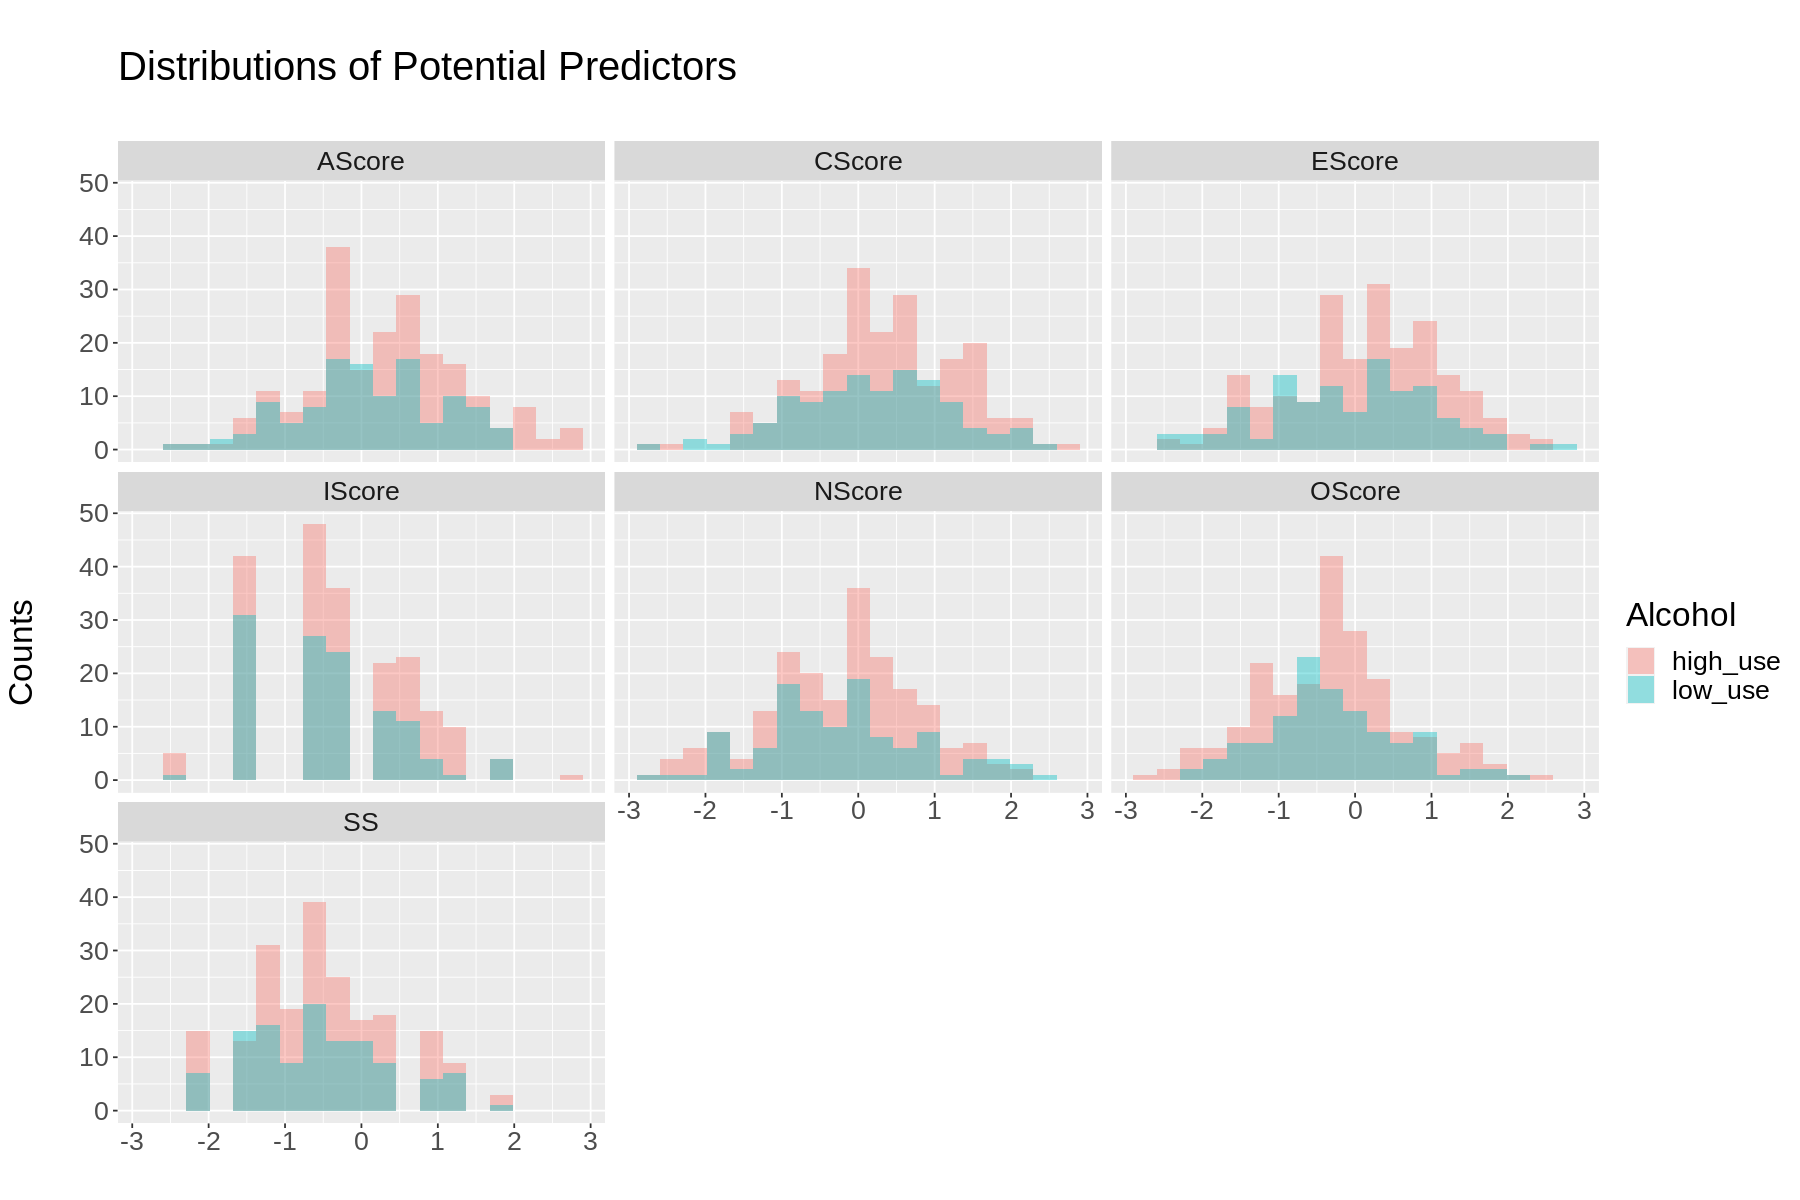

In [169]:
options(repr.plot.width = 15, repr.plot.height = 10)

alcohol_longer <- alcohol_train |> 
                pivot_longer(cols = NScore:SS,
                             names_to = "Potential_predictors",
                             values_to = "Values") 

alcohol_plot <- alcohol_longer |>
    ggplot(aes(x = Values, fill = Alcohol)) + 
    geom_histogram(position = 'identity', bins = 20, alpha = 0.4) +
    labs(x = "",
         y = "Counts\n",
         title = "\nDistributions of Potential Predictors\n") +
    facet_wrap(vars(Potential_predictors)) +
    theme(text = element_text(size = 20)) 
alcohol_plot

Figure 1.1: Distribution plots

<!-- - Looking at the plots above, the distribution of IScore seems to be right-skewed which is a good indicator that it could be a good predictor variable.

- The plot of OScore seems to be roughly semetric and has one distinct peak around -0.3. This means that it may be beneficial to be chosen as one of our predictor variable.

- However, for the rest of the plots, there does not seem to be an observable pattern because there are many outliers -->
<!-- 
- Unfortunately, no pattern in the plots above can be seem as well, therefore, we will be needing further analysis by researching the individual predictors to figure out which directly correlates with Alcohol consumption the most. -->

- All of the distribution plots in Figure 1.1 are roughly shaped like a bell-curve except for the distribution plot for `IScore`, which looks similar to a histogram skewed to the right.
- The distribution of our two classes, roughly follow the same pattern. The frequency of `high_use` observations are often much greater than `low_use`

### Choosing Predictors
After the exploratory data analysis, we did not find a distinction between the means and the distributions of the variables across the two classes in `ALcohol`. Therefore, we need further analysis to choose our predictors.

We decided to include only three predictors for two reasons after researching. Firstly, there is a loss in interpretability with an increase in the number of predictors. Most importantly, however, is that if we give the algorithm too many predictors, it would be really slow. While any three of the seven predictors could have been used, as they are all related to alcoholism in some way, we found that sensation seeking, impulsiveness, and extraversion were the three best. 

- Sensation seeking is the tendency to seek complex and intense experiences. Studies have consistently shown that higher sensation seeking is directly associated with binge drinking. It has been found that changes in drinking behaviour is directly paralleled to changes in sensation seeking. In addition, heavy alcohol use has been found to affect sensation seeking, with more active drinking habits leading to higher sensation seeking, and vice versa. This strong, bidirectional relationship causes sensation seeking to be a good predictor for alcohol use.

- Impulsiveness is the measure of how impulsive someone is, i.e. how often they tend to do things without thinking. Some consequences of this behavior include binging, the escalation of problems, outbursts, and property destruction. Not only is drug and alcohol use a consequence of impulsivity, but those who engage in destructive impulsive behavior may turn to alcohol as a result of their negative mental state. Furthermore, while binge eating is a common impulsive behavior, so too is binge drinking. It is because of this relationship that we decided to use impulsiveness as one of our predictors.

- Extraversion, referring to positive emotions and personality, is the measure of how energetic and sociable someone is. Someone with a high extraversion score enjoys the company of others as opposed to being alone, seeks relationships with others, and excels in social situations. Generally, this trait is understood to be linked to high alcohol consumption. It is believed that extraverts are more sensitive to the effects of alcohol, and gain a greater mood enhancement from consuming it compared to introverts. In order to study and examine this relationship, we chose extraversion as a predictor.

We also decided not to use age as one of our predictors, despite its strong relationship with alcohol consumption. This is because the goal of our analysis is to find the correlation between personality and alcohol use. While studying the relationship between age and alcohol is certainly useful, age is not a personality trait, and so we decided against including it in our analysis. 


**LUKE & KIMMY EDIT THIS** 

**edited. wait for checking.**

### Building the Classifier

1. We define our predictors and our target variable using `recipe()`. Scaling and centering are implemented within the recipe as well.
2. To build our classification model, we use `nearest_neighbor()` and set `neighbors = tune()` to find the most optimal k-value.
3. Perform 5-fold cross-validation with k-values ranging from 1 to 50.
4. Create a workflow to combine the recipe, the model and apply the `tune_grid()` function for cross validation. 
5. Lastly, we use `collect_metrics()` to collect the accuracy for each value of k and visually identify our best k-value with a line plot.

In [170]:
set.seed(6699)

# building the recipe
alcohol_recipe <- recipe(Alcohol ~ IScore + SS + EScore, data = alcohol_train) |>
                  step_scale(all_predictors()) |> 
                  step_center(all_predictors())

# tuning the classifier
alcohol_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |> 
    set_engine("kknn") |> 
    set_mode("classification")

# performing 5-fold cross validation
alcohol_vfold <- vfold_cv(alcohol_train, v = 5, strata = Alcohol)

# creating a dataframe with k-values
gridvals <- tibble(neighbors = seq(1, 50))

# collecting the results
alcohol_results <- workflow() |> 
    add_recipe(alcohol_recipe) |> 
    add_model(alcohol_spec) |> 
    tune_grid(resamples = alcohol_vfold, grid = gridvals) |> 
    collect_metrics() |> 
    filter(.metric == "accuracy")

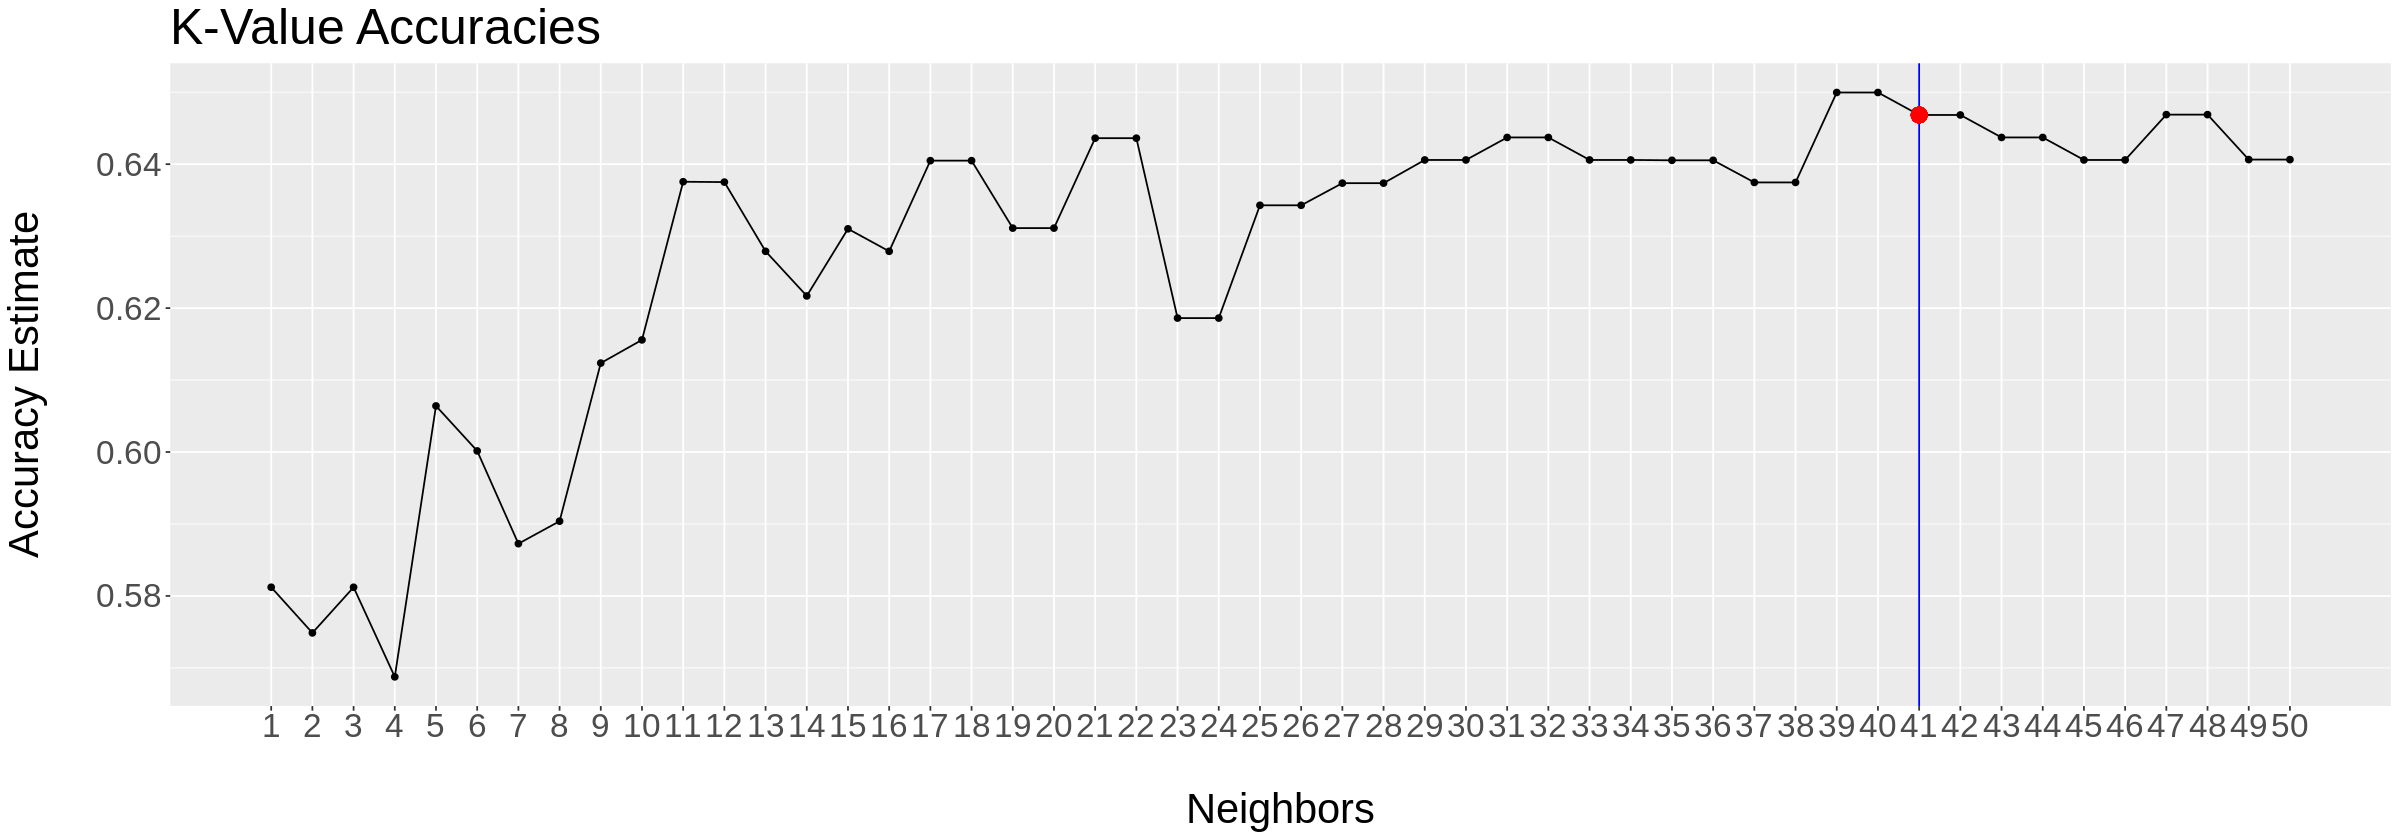

In [171]:
options(repr.plot.width = 20, repr.plot.height = 7)

acc <- alcohol_results |>
         select(neighbors, mean) |>
         filter(neighbors == 41)|>
         pull(mean)

accuracy_plot <- alcohol_results |> 
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    geom_vline(xintercept = 41, colour = "blue") +
    geom_point(aes(x = 41, y = acc), size = 4, colour = "red") +
    labs(x = "\nNeighbors",
         y = "Accuracy Estimate\n",
         title = "K-Value Accuracies") +
scale_x_continuous(limits = c(1, 50), breaks = seq(1, 50), minor_breaks = seq(1, 50, 1)) +
    theme(text = element_text(size = 25))

accuracy_plot

Figure 1.2: Accuracies for varying values of k-neighbors

### Choosing K

Although the highest accuracy occurs when the number of neighbors is 39 and 40, both of them are not ideal values of k.
- Looking at Figure 1.2, the accuracy below 39 varies significantly.
- Since the K-NN classification algorithm is based on majority votes and we are predicting between two classes, a k-value of 40 could lead to a tie.
- Therefore, we choose the next best value, i.e, **41**.

In [172]:
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 48) |> 
    set_engine("kknn") |> 
    set_mode("classification")

alcohol_fit <- workflow() |>
  add_recipe(alcohol_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = alcohol_train)

### K-NN Classification

We now re-train our classification model with the chosen k-value, use it to predict the `Alcohol` classes in the testing set `alcohol_test` and check the accuracy of our classifier.

In [173]:
# predicting the results
alcohol_predictions <- predict(alcohol_fit, alcohol_test) |> 
    bind_cols(alcohol_test)

# checking the accuracy
alcohol_acc <- alcohol_predictions |> 
    metrics(truth = Alcohol, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)

alcohol_acc

.metric,.estimate
<chr>,<dbl>
accuracy,0.6388889


Table 1.3: Prediction accuracy of the classifier

### Summarizing the Results

From Table 1.3, we find out that the accuracy of our classification model turned out to be 63.88%. To get a better idea of how the classification model performed, we build a confusion matrix.

In [174]:
# building the confusion matrix
alcohol_cm <- alcohol_predictions |>
              conf_mat(truth = Alcohol, estimate = .pred_class)

alcohol_cm

          Truth
Prediction high_use low_use
  high_use       69      39
  low_use         0       0

Table 1.4: Confusion matrix

From the information in Table 1.4, it looks like our classifier labeled all the observations `high_use` regardless of their true value.

### Visualizing the Results

We create a bar plot for the number of observations of each class using the confusion matrix based on the proportion of correct and incorrect predictions.

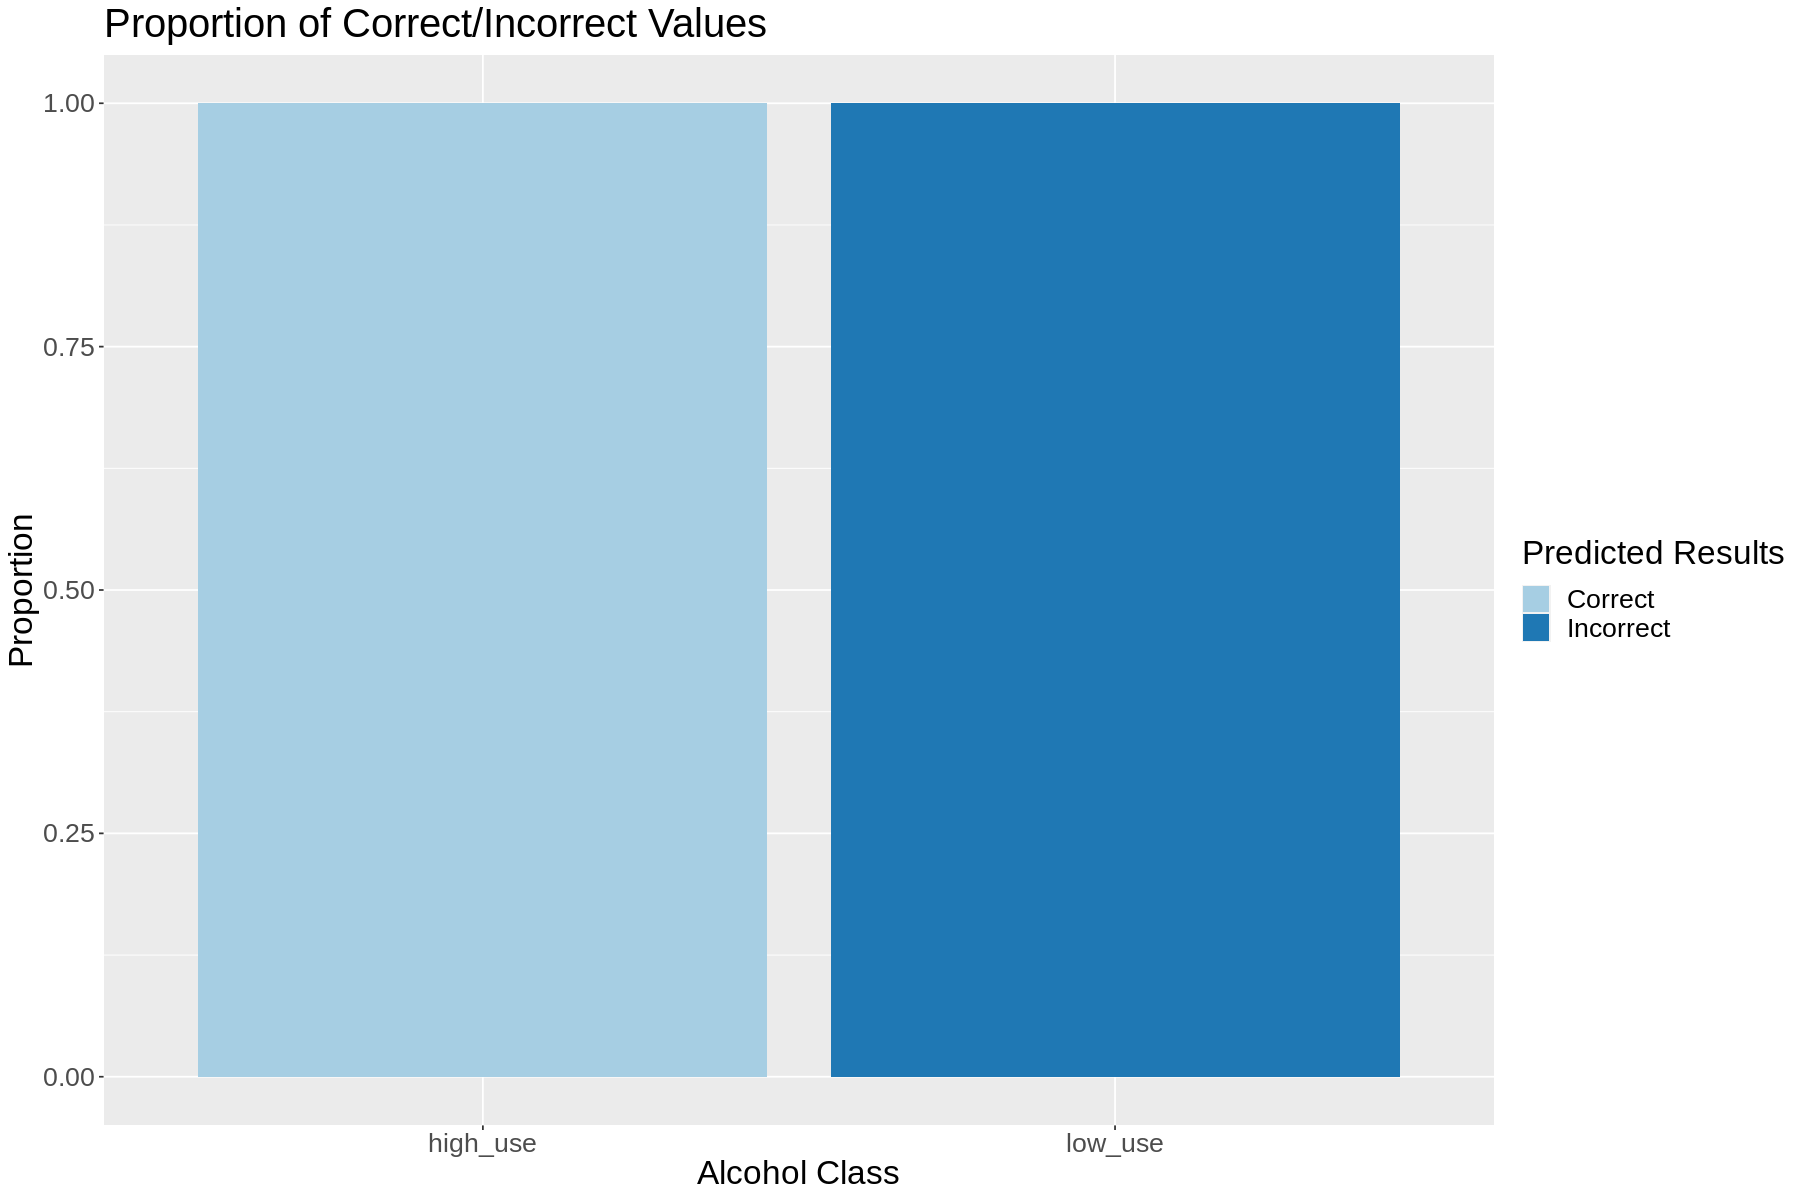

In [177]:
# creating a table to find out the proportion of correct/incorrect predictions
confusion_table <- alcohol_cm$table |>
                   as_tibble() |>
                   mutate(
                       correct_prediction = case_when(
                           Prediction == Truth ~ "Correct",
                           TRUE ~ "Incorrect"
                           )
                   )

options(repr.plot.width = 15, repr.plot.height = 10)

# bar plot for the proportion of correct/incorrect predictions
ggplot(confusion_table, aes(x = Truth, y = n, fill = correct_prediction)) +
    geom_bar(stat = "identity", position = "fill") +
    labs(x = "Alcohol Class", y = "Proportion",
         title = "Proportion of Correct/Incorrect Values", 
         fill = "Predicted Results") +
    theme(text = element_text(size = 20)) +
    scale_fill_brewer(palette = "Paired")


Figure 1.3: Proportion of correct/incorrect predictions

From figure 1.3, we can conclude that all of the values of `high_use` were predicted correctly whereas all the values of `low_use` were predicted incorrectly.

*Old model results - double click to see inside*

<!-- The accuracy of our classifier turned out to be about 43%, which is not good. There are a number of possible explanations for this innacuracy.
1. Because we're limited by the power of our computers, we can only pick 3 predictors before the algorithm becomes too slow to use reliably. This means that we're only using three out of the seven possible predictors. Undoubtedly, the predictor would be more accurate if we were to use all of them, but we're unable to.
2. While the original dataset was extensive, we had to filter out over three quarters of the observations due their being over-claimants. Because we were only left with 428 observations after the filtering, the resulting algorithm is much less accurate than had it had access to more data.
3. An overwhelming majority of the observations had a consumption level of CL5 for alcohol. This can be explained due to the drug's popularity, but also caused the algorithm to overpredict CL5 in the data
4. The three predictors we chose have a strong positive relationship with alcohol consumption, i.e. a higher trait rating means more consumption. Had we chosen a balancec of positive and negatively related traits, it is possible the algorithm would have a higher accuracy -->

## Discussion:

*Old model discussion - double click to see inside*

<!-- - We got rid of couple of variable which also included the consumption of other drugs which could be another factor that could affect the prediction of the response variable. 
- Another factor could be the imbalance in the nubmer of observations among the classes of Alcohol.
- Although the chosen variables have somewhat of a correlation between the target varible, the connections between them were not as strong as we hoped
- it seems like so far we chose predictor that may need lead to higher alcohol consumption maybe that's why we don't have predictions between CL0-CL4.
 -->

We did the prediction without dividing seven categories into two groups previously, and our predictions on drug usage frequency are mainly distributed to CL5 (used in last week) with an extreme small amount of predictions is distributed to CL6 (used in last day), and counts zero on CL0 to CL4. The accuracy of our classifier turned out to be about 43.12%, which is not good enough, possible explanations for this innacuracy are the small number of predictors we choose, the low usage rate of the original dataset, unbalanced data distribution, bias of predictors and the Knn algorithm is not the perfect algorithm for the prediction.

1. Because we're limited by the power of our computers, we can only pick three predictors before the algorithm becomes too slow to use reliably. This means that we're only using three out of the seven personality traits, among the twelve possible predictors. Undoubtedly, the predictor would be more accurate if we were to use all of them, but we're unable to.

2. While the original dataset was extensive, we had to filter out over three quarters of the observations due their being over-claimants. Because we were only left with 428 observations after the filtering, the resulting algorithm is much less accurate than had it had access to more data.

3. An overwhelming majority of the observations had a consumption level of CL5 for alcohol. This can be explained due to the drug's popularity, but also caused the algorithm to overpredict CL5 in the dataset after we using the unscaled dataset for training.

4. The three predictors we chose have a strong positive relationship with alcohol consumption, i.e. a higher Escore is related to more alcohol consumption. Had we chosen a balanced number of positive and negatively related personality traits, it is possible the algorithm would have a higher accuracy.

5. The Knn algorithm is good at grouping dataset, instead working with ordered dataset. The drug consumption dataset has an order from CL0 to CL6, and Knn algorithm would treat all CL0 to CL6 equally as seven different categories, rather than seven different amount of drinking.

In response to point 3, we group CL0 to CL4 as low-use group and CL5 to CL6 as high-use group, leading a much better accuracy at about 63.89% of our prediction. Grouping the seven categories into two can improve the point 3, by increasing scale of low-use group, yet the problem is not sloved totally, therefore the accuracy is still not good enough, and this may caused by same reasons above.
Besides, one more possible reason could be the weak correlation between the chosen predictors and target variable. Although the three chosen predictors are related to the target varible, the connections between them may not as strong as we assumed, which means these three personality don't influence an individual's alcohol consumptions as much as we hoped. 


Future questions we may lead to:
- Besides personality traits, what main factors can affect an individual's alcohol use? If we also use them as predictors, how much would our predictions become more efficient?

 
**LUKE & KIMMY EDIT THIS**

**LUKE, HELP ON FUTURE QUESTIONS**